# Instacart Market Basket Analysis (CLEANER) 

### INTRODUCTION 

Online grocery shopping has rapidly transformed how consumers purchase everyday goods, with platforms like Instacart leading the charge. Understanding customer behavior within this ecosystem is essential for optimizing marketing strategies, inventory planning, and personalized recommendations. This project explores customer ordering patterns using Instacart’s open-source dataset, which includes millions of anonymized grocery orders spanning a wide range of products and users.

### Project Overview
This project focuses on analyzing key behavioral trends in Instacart’s user base through exploratory data analysis (EDA). By investigating when customers shop, how frequently they reorder, and which products they favor, we aim to uncover actionable insights that can inform future modeling efforts such as A/B testing, forecasting, and user segmentation.

The analysis is structured into the following key areas:

* Time-based ordering behavior (by hour and day of week)
* Customer engagement (number of orders per user)
* Product-level insights (most ordered, most reordered, and reorder proportions)
* Purchase rhythms (time intervals between orders)

The project serves as a foundational layer for advanced analytics workflows including churn analysis, campaign targeting, and product-level demand prediction.
 
### Hypotheses
1. Time-of-Day Behavior: Most users place their grocery orders during the late morning to early evening hours, with significantly lower activity during nighttime hours.

2. Day-of-Week Trends: Order volume is highest at the beginning of the week (Sunday and Monday), suggesting a behavioral trend in weekly grocery restocking.

3. Reordering Patterns: Certain staple products (e.g., fruits, dairy) exhibit higher reorder rates, indicating strong consumer loyalty or routine behavior.

4. Customer Frequency: A large portion of users place only one or two orders, with a sharp drop in repeat ordering behavior—highlighting retention as a potential area for business growth.

5. Ordering Intervals: Many customers tend to reorder on a weekly or monthly cycle, shown by peaks in the distribution of days since prior orders.

In [1]:
# Imports and Setup
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load Data
orders = pd.read_csv("datasets/instacart_orders.csv", delimiter=';')
products = pd.read_csv("datasets/products.csv", delimiter=';')
order_products = pd.read_csv("datasets/order_products.csv", delimiter=';')

# Clean & Prepare Data
orders.drop_duplicates(inplace=True)
products.dropna(subset=['product_name'], inplace=True)
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype(int)

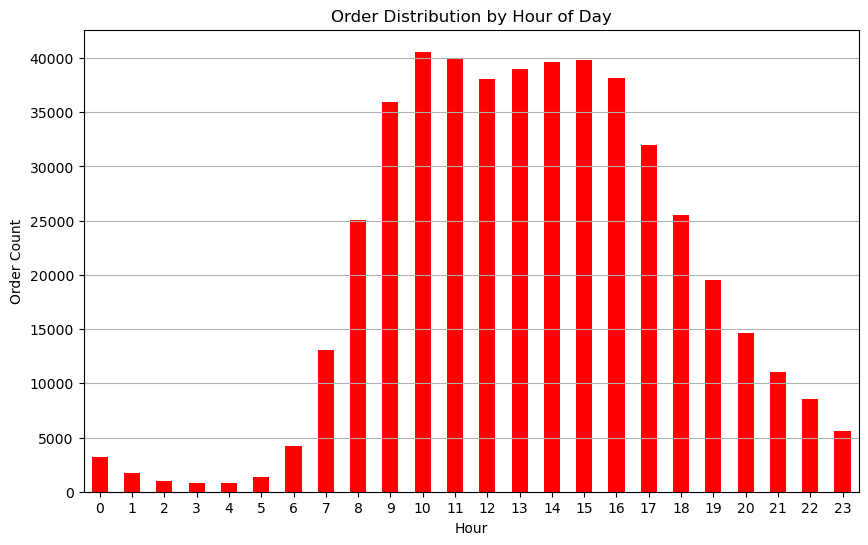

In [3]:
# Time-Based Order Analysis

## Hourly Order Distribution
orders['order_hour_of_day'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6), color='red')
plt.title('Order Distribution by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Order Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

The hourly order distribution reveals that most Instacart users place orders between 9:00 AM and 6:00 PM. This period marks the highest frequency of orders, suggesting that users prefer to shop during daytime hours when they are likely more active or available. In contrast, order volume significantly decreases during the night and early morning hours, especially between midnight and 6:00 AM, when activity is minimal. This pattern may reflect typical daily routines, indicating when users are most likely to plan and restock their groceries.

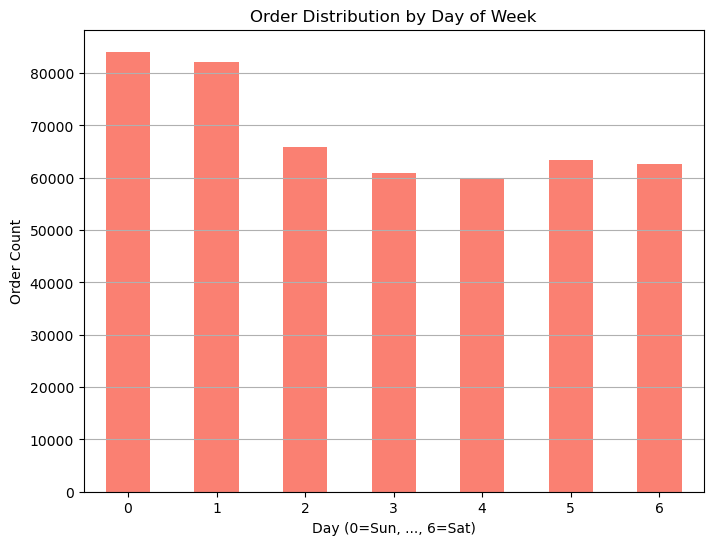

In [4]:
## Daily Order Distribution
orders['order_dow'].value_counts().sort_index().plot(kind='bar', figsize=(8, 6), color='salmon')
plt.title('Order Distribution by Day of Week')
plt.xlabel('Day (0=Sun, ..., 6=Sat)')
plt.ylabel('Order Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Analysis of order frequency by day of the week shows that Sundays and Mondays are the most popular days for placing grocery orders. These two days consistently outperform others in terms of total order volume, suggesting that users often restock at the start of the week. Order volume declines steadily as the week progresses, with Thursday showing the lowest number of orders. This trend highlights a clear weekly rhythm in grocery shopping behavior, which could inform delivery planning and marketing efforts.

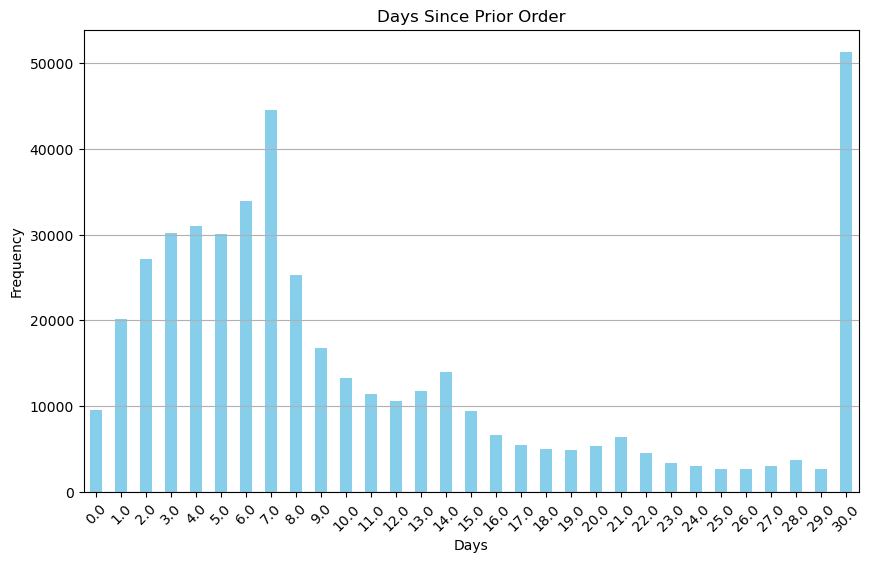

In [5]:
## Days Since Prior Order
orders['days_since_prior_order'].dropna().value_counts().sort_index().plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Days Since Prior Order')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

The distribution of days since a user’s prior order highlights patterns in repeat purchasing behavior. Notably, there are peaks at 7, 14, and 30 days, indicating that many users follow weekly or monthly grocery shopping routines. This regularity suggests that Instacart users often maintain structured shopping cycles, which can be leveraged for targeted marketing, such as reminders or reorder prompts sent at predictable intervals.

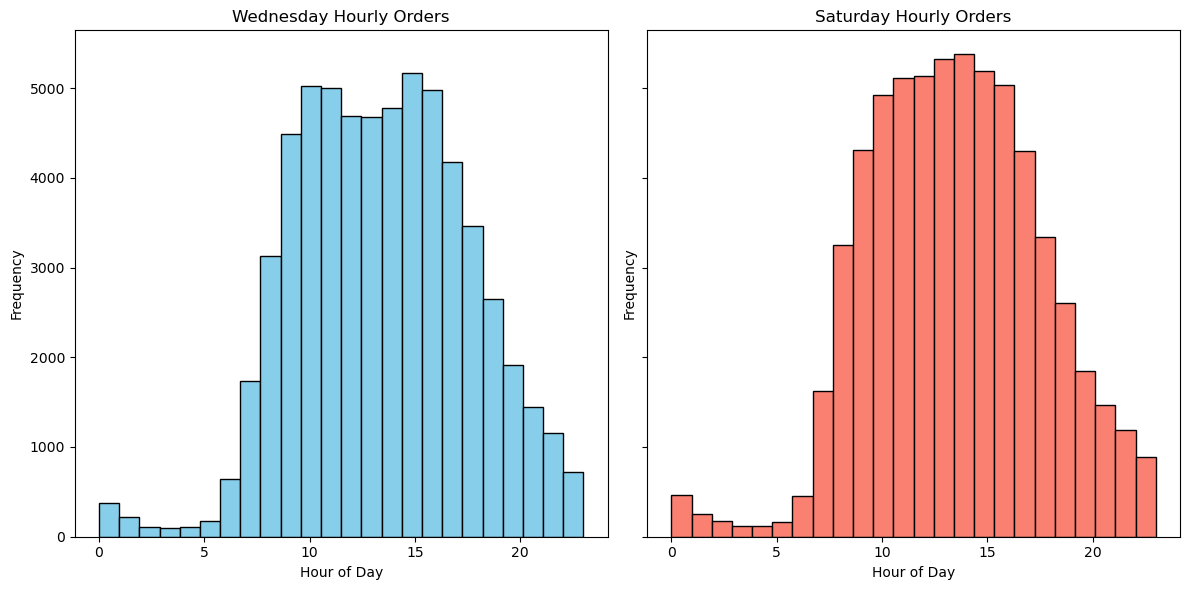

In [11]:
# Hourly Distribution: Wednesday vs Saturday
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
for ax, dow, color, label in zip(axs, [3, 6], ['skyblue', 'salmon'], ['Wednesday', 'Saturday']):
    subset = orders[orders['order_dow'] == dow]['order_hour_of_day']
    ax.hist(subset, bins=24, color=color, edgecolor='black')
    ax.set_title(f'{label} Hourly Orders')
    ax.set_xlabel('Hour of Day')
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

Comparing hourly ordering patterns on Wednesdays and Saturdays reveals consistent peak shopping windows. On both days, orders surge during the late morning to mid afternoon, particularly from 10:00 AM to 4:00 PM. These time frames align with broader hourly trends but also emphasize that weekend and midweek shopping behaviors are quite similar. Overnight hours once again show minimal activity. Understanding these day specific patterns can help optimize staffing, promotions, and system loads during high traffic hours.

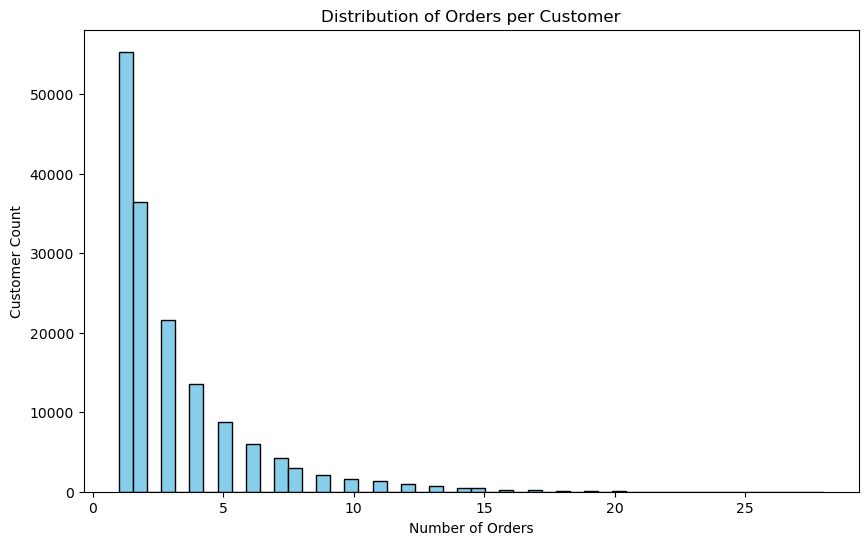

In [7]:
# Customer Behavior: Orders per User
orders_per_user = orders.groupby('user_id')['order_id'].nunique()
plt.figure(figsize=(10, 6))
plt.hist(orders_per_user, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Customer Count')
plt.show()

The distribution of orders per customer reveals that the majority of users place only one or two orders, with a steep drop in frequency as the number of orders increases. This suggests that while Instacart has a broad user base, customer retention could be improved. Many users may try the service once but fail to become repeat customers. Encouraging ongoing engagement through personalized recommendations, loyalty programs, or incentives could help convert one time users into long term shoppers.

In [8]:
# Product Popularity

## Most Frequently Ordered Products
merged = order_products.merge(products[['product_id', 'product_name']], on='product_id')
top_products = merged['product_name'].value_counts().head(20)
print("\nTop 20 Most Ordered Products:\n", top_products)


Top 20 Most Ordered Products:
 product_name
Banana                      66050
Bag of Organic Bananas      53297
Organic Strawberries        37039
Organic Baby Spinach        33971
Organic Hass Avocado        29773
Organic Avocado             24689
Large Lemon                 21495
Strawberries                20018
Limes                       19690
Organic Whole Milk          19600
Organic Raspberries         19197
Organic Yellow Onion        15898
Organic Garlic              15292
Organic Zucchini            14584
Organic Blueberries         13879
Cucumber Kirby              13675
Organic Fuji Apple          12544
Organic Lemon               12232
Apple Honeycrisp Organic    11993
Organic Grape Tomatoes      11781
Name: count, dtype: int64


An analysis of the most frequently ordered products shows that fresh produce dominates customer preferences. Bananas, organic bananas, and organic strawberries are the top three most commonly purchased items, with bananas alone exceeding 66,000 orders. The list continues with other fruits, vegetables, and common household staples like organic whole milk. This trend suggests that Instacart is often used for stocking up on perishable essentials, which could be prioritized in promotions and restocking algorithms.

In [9]:
## Most Reordered Products
reordered = order_products.groupby('product_id')['reordered'].sum().reset_index()
reordered = reordered.merge(products[['product_id', 'product_name']], on='product_id')
top_reordered = reordered.sort_values(by='reordered', ascending=False).head(20)
print("\nTop 20 Most Reordered Products:\n", top_reordered[['product_name', 'reordered']])


Top 20 Most Reordered Products:
                   product_name  reordered
22332                    Banana      55763
11772    Bag of Organic Bananas      44450
18970      Organic Strawberries      28639
19660      Organic Baby Spinach      26233
42362      Organic Hass Avocado      23629
42863           Organic Avocado      18743
25022        Organic Whole Milk      16251
42739               Large Lemon      15044
25129       Organic Raspberries      14748
15037              Strawberries      13945
23546                     Limes      13327
20590      Organic Yellow Onion      11145
22431            Organic Garlic      10411
40374          Organic Zucchini      10076
44601            Cucumber Kirby       9538
25345        Organic Fuji Apple       8989
7400   Apple Honeycrisp Organic       8836
35248       Organic Blueberries       8799
5280              Organic Lemon       8412
44203       Organic Half & Half       8389


Reorder data indicates strong customer loyalty to certain products, especially staples like bananas, organic bananas, and organic strawberries; Each with tens of thousands of repeat purchases. These products mirror the top ordered list, reinforcing their importance in users’ shopping routines. Their high reorder volumes highlight Instacart’s potential to support habitual purchasing behavior, making them ideal candidates for features like “Buy Again” suggestions or default cart templates.

In [10]:
## Reorder Proportions
total = order_products.groupby('product_id')['reordered'].count().reset_index(name='total_orders')
reorders = order_products.groupby('product_id')['reordered'].sum().reset_index(name='total_reorders')
reorder_ratio = total.merge(reorders, on='product_id')
reorder_ratio['reorder_proportion'] = reorder_ratio['total_reorders'] / reorder_ratio['total_orders']
reorder_ratio = reorder_ratio.merge(products[['product_id', 'product_name']], on='product_id')
reorder_ratio = reorder_ratio[['product_name', 'reorder_proportion']].sort_values(by='reorder_proportion', ascending=False)
reorder_ratio['reorder_proportion'] = reorder_ratio['reorder_proportion'].map("{:.1%}".format)
print("\nTop 20 Products by Reorder Proportion:\n", reorder_ratio.head(20))


Top 20 Products by Reorder Proportion:
                                             product_name reorder_proportion
11995  Advanced Care Plaque Guard Frosted Mint Antipl...             100.0%
39837                     Seafood Magic Seasoning Blends             100.0%
26235                    Pretzels Sesame Baked Not Fried             100.0%
26251                          Homestyle Salisbury Steak             100.0%
39865                     Purrfect Delicacies Multi-pack             100.0%
26278               Lake Shore Blend Medium Roast Coffee             100.0%
39859                           Juice Squeeze Wild Berry             100.0%
39854                                  Riesling Blue Qba             100.0%
26340                   Toffee Crunch Milk Chocolate Bar             100.0%
27155                              Organic Carob Soymilk             100.0%
26350                 Candy Bar- Milk Chocolate- Coconut             100.0%
39834                 Twisted Berry Fruit & Veg

The products with the highest reorder proportions( some reaching 100% ) suggest a niche subset of items that are consistently repurchased every time they are ordered. These include health and beauty products, specialty snacks, and certain beverages. While these items may not appear in the overall top ordered list, their near total reorder rates indicate high satisfaction or necessity among a loyal user base. These findings are valuable for targeted retention strategies, personalized promotions, or bundling opportunities.

# CONCLUSION

This exploratory analysis of Instacart’s customer order data uncovered meaningful insights into user behavior, shopping patterns, and product preferences. Through a comprehensive breakdown of order frequency across time, we observed that customers are most active between 9 AM and 6 PM, particularly on Sundays and Mondays, suggesting a strong weekly shopping rhythm that aligns with typical restocking habits. Additionally, the frequency of orders placed 7, 14, or 30 days after a previous purchase indicates a high degree of regularity in user behavior, which presents opportunities for timely and personalized marketing strategies.

Our review of individual customer engagement revealed that the majority of users place only one or two orders, signaling potential gaps in user retention. Encouraging repeat purchases through loyalty programs, tailored incentives, or proactive follow up communications could convert more trial users into long term customers.

On the product level, fresh produce (especially bananas and organic fruit) dominated both the most ordered and most reordered items, reinforcing their role as household staples. Furthermore, products with extremely high reorder proportions (approaching or at 100%) highlight a subset of consistently satisfying items that could be leveraged in features such as auto-refill suggestions or personalized recommendation engines.

Altogether, these insights lay the groundwork for more advanced analysis, including customer segmentation, churn prediction, demand forecasting, and A/B testing of marketing campaigns. By understanding when and what customers order, Instacart can optimize user experience, improve operational efficiency, and drive sustained business growth through data informed decision making.